In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline  
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

#### 6.Загрузите ряд, создайте новый ряд значений среднего дневного уровня производства молока в фунтах на одну корову, поделив на число дней в месяце (вычисляется с помощью функции monthrange из пакета calendar). Постройте график полученного ряда; какой из приведённых ниже графиков у вас получился?

In [3]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [17]:
x = milk.index.values
y = [v/float(month.days_in_month) for month, v in zip(milk.index, milk['milk'].values)]

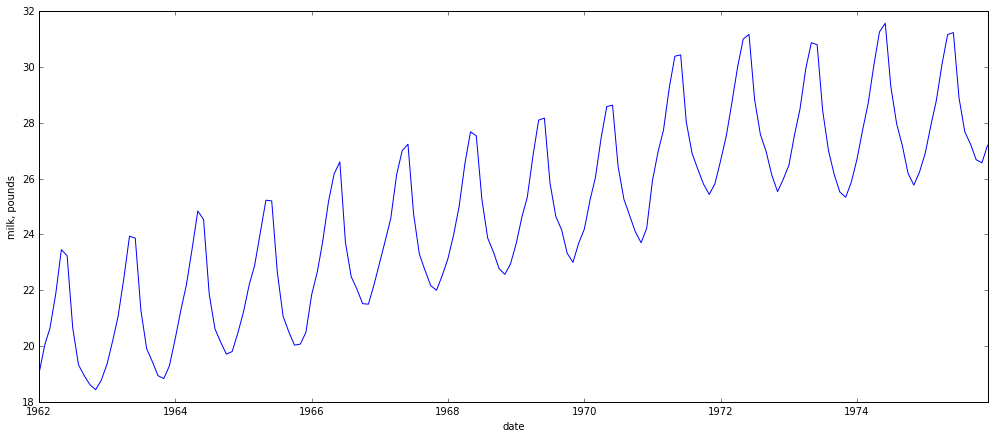

In [18]:
plt.plot_date(x, y, 'b-')
plt.xlabel('date')
plt.ylabel('milk, pounds')
plt.show()

7.Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерий Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

In [19]:
import statsmodels.api as sm
(t, pvalue, _, _, _, _) = sm.tsa.stattools.adfuller(y)
pvalue

0.68221515130814359

In [23]:
milk.daily_diff1 = milk.milk - milk.milk.shift(1)
(t, pvalue, _, _, _, _) = sm.tsa.stattools.adfuller(milk.daily_diff1[1:])
pvalue

0.030068004001785966

In [24]:
milk.daily_diff12 = milk.milk - milk.milk.shift(12)
(t, pvalue, _, _, _, _) = sm.tsa.stattools.adfuller(milk.daily_diff12[12:])
pvalue

0.16079880527711332

In [25]:
milk.daily_diff1_12 = milk.daily_diff1 - milk.daily_diff1.shift(12)
(t, pvalue, _, _, _, _) = sm.tsa.stattools.adfuller(milk.daily_diff1_12[13:])
pvalue

1.8654234318788342e-05

In [26]:
row = milk.daily_diff1_12[13:]

8.Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции.Исходя из этого графика, какое начальное приближение вы предложили бы для параметра Q в модели SARIMA?

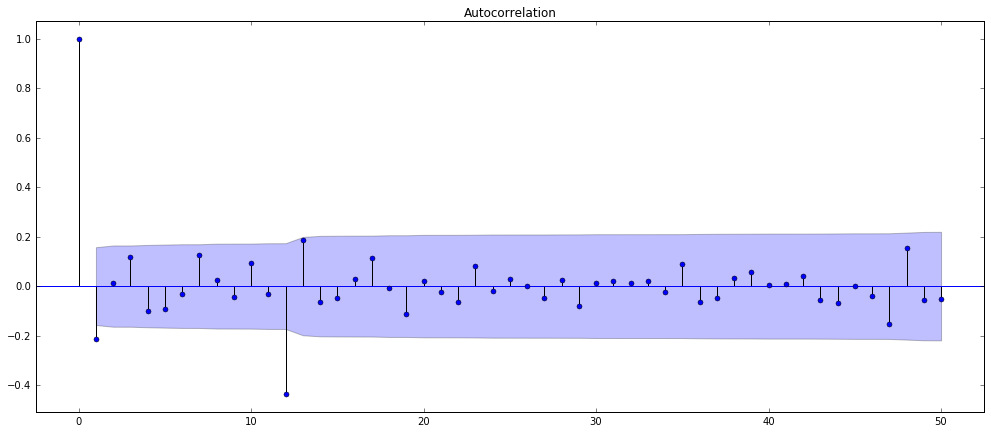

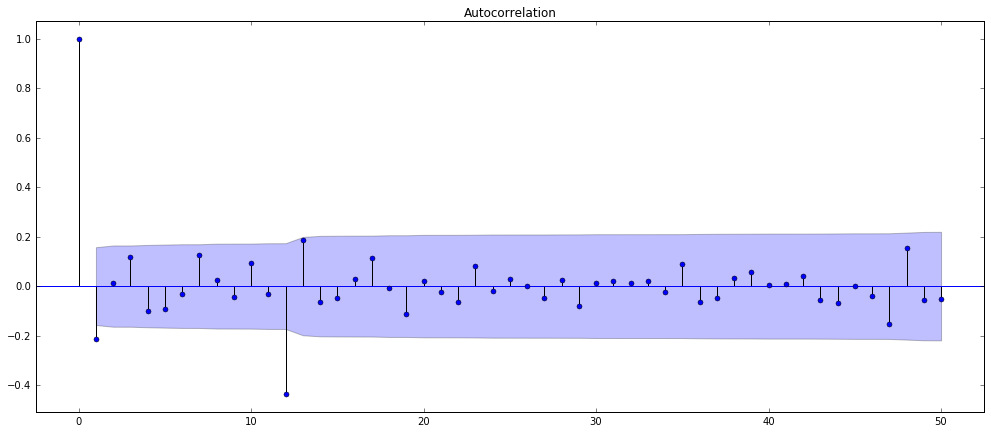

In [28]:
import statsmodels.api as sm
plt.figure(figsize(17, 7))
sm.graphics.tsa.plot_acf(milk.daily_diff1_12[13:].values.squeeze(), lags=50)

Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции. Исходя из этого графика, какое начальное приближение вы предложили бы для параметра p в модели SARIMA?

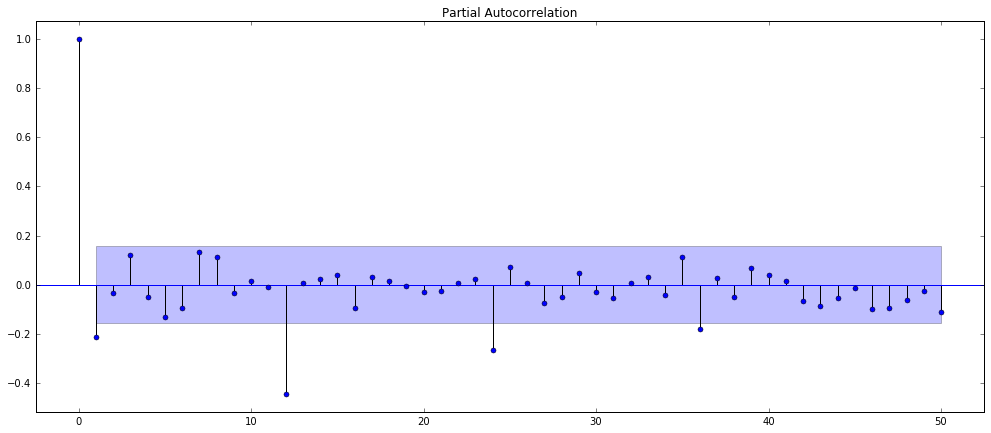

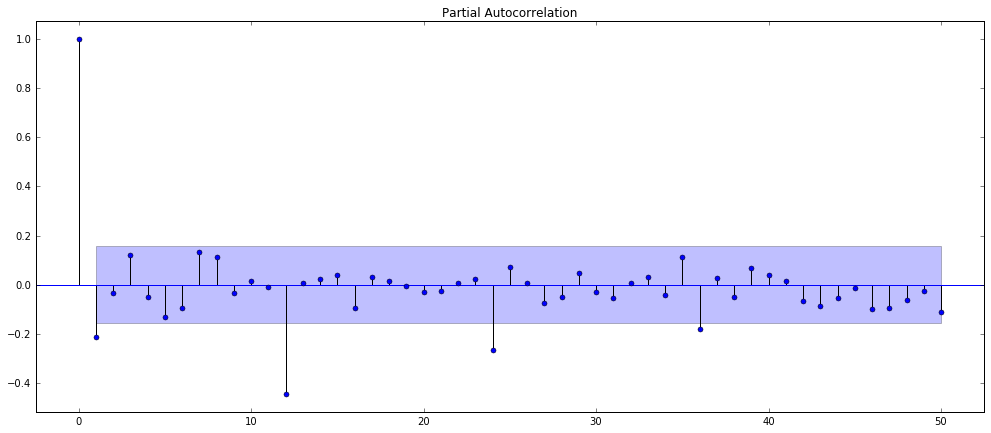

In [29]:
import statsmodels.api as sm
plt.figure(figsize(17, 7))
sm.graphics.tsa.plot_pacf(milk.daily_diff1_12[13:].values.squeeze(), lags=50)

#### 4. Примените к ряду из предыдущего вопроса критерий Дики-Фуллера. Чему равен полученный достигаемый уровень значимости? Округлите до двух знаков после десятичной точки.

In [32]:
import statsmodels.api as sm
(t, pvalue, _, _, _, _) = sm.tsa.stattools.adfuller(y)
pvalue

0.62742670860303096

In [64]:
print 'pvalue=%f' % pvalue
print 'Answer #4: %g' % round(pvalue, 2)

pvalue=0.627427
Answer #4: 0.63


#### 5. Часто, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, имеет смысл перед началом прогнозирования поделить весь ряд на число дней в периоде. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.

Корректно определить число дней в месяце можно с помощью свойства days_in_month у индекса ряда или функции monthrange из пакета calendar. Используйте число дней в месяце для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.

В качестве ответа введите сумму значений полученного показателя за весь период; округлите до двух знаков после десятичной точки.

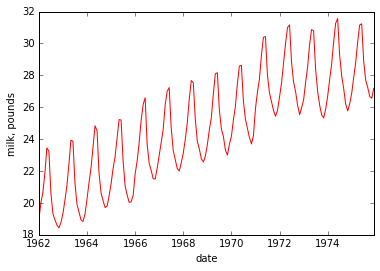

In [63]:
y_mean_by_day = [xm/float(month.days_in_month) for month, xm in zip(milk.index, y)]
plt.plot_date(x, y_mean_by_day, 'r-')
#plt.plot_date(x, y, 'b-')
plt.xlabel('date')
plt.ylabel('avg milk, pounds')

In [66]:
print sum(y_mean_by_day)
print 'Answer #5: %g' % round(sum(y_mean_by_day), 2)

4166.3266619
Answer #5: 4166.33
